# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('previsao_de_renda.csv')

In [49]:
df.head(5)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Com o código abaixo irei criar um novo DataFrame sem as colunas `Unnamed: 0 ` e `index`, pois as mesmas se referem à posição no DataFrame, e a coluna `mau`.

In [50]:
df = df.drop(columns=['Unnamed: 0', 'index'])
df.shape

KeyError: ignored

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [51]:
df.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


Com a tabela acima não fica muito claro, então com o clustermap abaixo fica um pouco mais claro quais as variáveis mais correlacionadas com a `renda`: `tempo_emprego` e `posse_de_veiculo`.

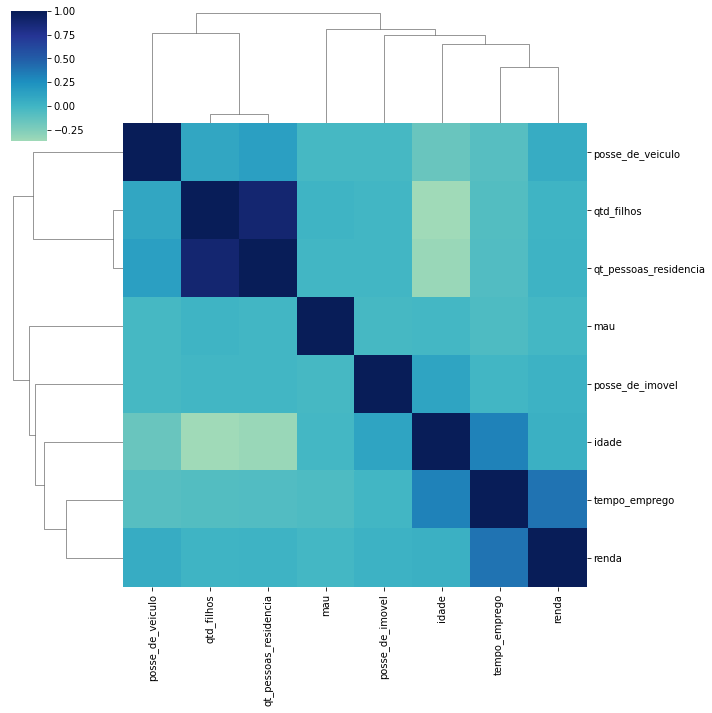

In [52]:
sns.clustermap(df.corr(), figsize=(10, 10), center = 0, cmap='YlGnBu')

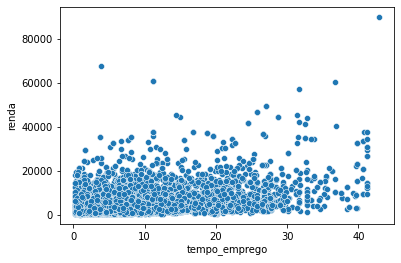

In [59]:
sns.scatterplot(data=df, x='tempo_emprego', y='renda')

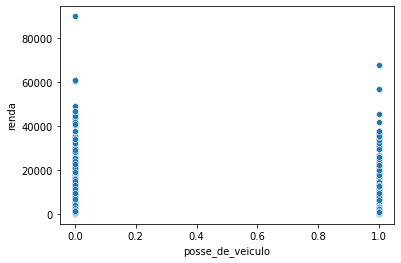

In [65]:
sns.scatterplot(data=df, x='posse_de_veiculo', y='renda')

Como a variável `posse_de_veiculo` é uma variável que indica sim (1) ou não (0), fiz outro scatterplot com a variável `idade`, que é uma variável contínua.

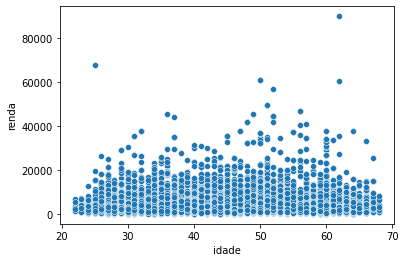

In [64]:
sns.scatterplot(data=df, x='idade', y='renda')

3) Na sua opinião, há outliers na variável renda?

Acredito que possua alguns outliers logo no início do eixo x, onde a `renda` parece não acompanhar uma leve evoluação natural de acordo com o tempo de emprego e idade, respectivamente em cada gráfico.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [78]:
df_log = df.copy()
df_log['log_renda'] = np.log(df_log['renda'])

In [80]:
df_log[['renda', 'log_renda']]

,renda,log_renda
0,3369.24,8.122442
1,6096.14,8.715411
2,5658.98,8.640999
3,7246.69,8.888300
4,4017.37,8.298383
...,...,...
14995,1193.29,7.084469
14996,2519.18,7.831689
14997,1586.85,7.369506
14998,6975.39,8.850144


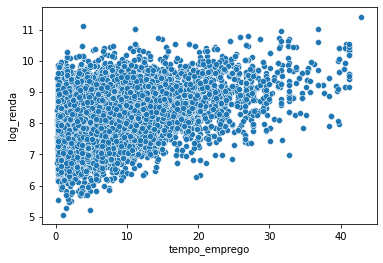

In [82]:
sns.scatterplot(data=df_log, x='tempo_emprego', y='log_renda')

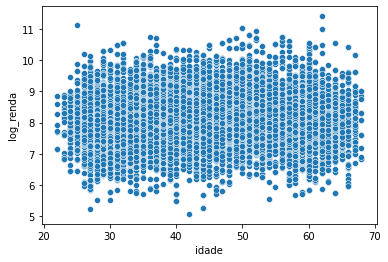

In [84]:
sns.scatterplot(data=df_log, x='idade', y='log_renda')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Não acredito que tenha melhorado, visto que apesar de haver um maior agrupamento dos resultados, não considero o suficiente para traçar uma padrão ou algo em definitivo.
